# A short analysis of the vaccinations per country and the vaccines used

## COVID-19 World Vaccination Progress Dataset


### Raul Almuzara

--------------------------------

Using the dataset

https://www.kaggle.com/gpreda/covid-world-vaccination-progress

We find:

(a) The ranking of countries based on the number of people fully vaccinated.

(b) The ranking of countries based on the number of people fully vaccinated per hundred.

(c) The list with the vaccines used.

(d) The number of vaccines of each type used in the European Union.

----------------------------------------

#### Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load datasets:

Two datasets are provided. Both files can be downloaded in the Kaggle link above (version 249). They are also in this GitHub repository. They must be placed in the same folder as this notebook if no path is specified.

In [2]:
data1 = pd.read_csv('country-vaccinations-v249.csv',sep=',')
data2 = pd.read_csv('country-vaccinations-by-manufacturer-v249.csv',sep=',')

#### Note that the dataset is updated very often with new data every few days. The latest data available when this analysis was carried out was version 249 uploaded on March 31, 2022.

-----------------------------------

# Task (a) - The ranking of countries based on the number of people fully vaccinated

We have data for different days and the numbers in the attribute *people_fully_vaccinated* are cumulative.

In total, the dataset has 223 countries:

In [3]:
len(np.unique(data1['country']))

223

We will need to retrieve the value for the latest date where there is available data (when we do not have the NaN value) for each country.

Since NaN values in the attribute *people_fully_vaccinated* do not provide information, we drop them.

In [4]:
clean_data1 = data1.dropna(subset=['people_fully_vaccinated'])

In this version of the dataset, all countries have at least one numerical value for *people_fully_vaccinated* at some date.

In [5]:
len(np.unique(clean_data1['country']))

223

Maybe that date is not always the latest possible, but we will consider them as a good approximation of the state of vaccination in a country as of March 2022.

We define the following two arrays to store the countries and the desired values of the attribute.

In [6]:
list_countries = np.unique(clean_data1['country']) # Full list of countries in the dataset

latest_vaccinations = np.array([]) # Here, we will save the latest values for 'people_fully_vaccinated'

We iterate over each country.

In [7]:
for country in list_countries:
    latest_vaccinations = np.append(latest_vaccinations,
                                    clean_data1[clean_data1['country']==country] # Append the data for each country
                                    .iloc[-1]['people_fully_vaccinated'])
                                    # We find the latest data in the index -1 (last instance of each country)

Thus, we end up with a dataframe where each country can be associated with the desired value:

In [8]:
fully_vaccinated = pd.DataFrame({'country': list_countries,
                                'people_fully_vaccinated': latest_vaccinations})

Finally, we sort the data to create a ranking

In [9]:
ranking1 = fully_vaccinated.sort_values(by=['people_fully_vaccinated'],ascending=False,ignore_index=True)

In [10]:
ranking1

,country,people_fully_vaccinated
0,China,1.240777e+09
1,India,8.282295e+08
2,United States,2.174990e+08
3,Brazil,1.602729e+08
4,Indonesia,1.588305e+08
...,...,...
218,Montserrat,1.804000e+03
219,Falkland Islands,1.775000e+03
220,Niue,1.417000e+03
221,Tokelau,9.680000e+02


So, this is the final result according to the available data about *people_fully_vaccinated*.

The countries with the highest number of fully vaccinated people are China, India, the United States, Brazil and Indonesia. They also happen to be among the most populated countries in the world, so it makes sense.

On the contrary, the countries with the lowest number of fully vaccinated people are Montserrat, the Falkland Islands, Niue, Tokelau and Pitcairn. They are regions with an extremely low number of inhabitants.

--------------------------------------

# Task (b) - The ranking of countries based on the number of people fully vaccinated per hundred

This is the ratio (in percent) between population fully immunized and total population up to the date in the country. It could be interesting to study ratios instead of absolute numbers as in Task (a). The absolute numbers that were described in Task (a) strongly depend on how populated a country is. Obviously, if a country has many inhabitants, there is a higher chance that the country will have more vaccinated people than countries with few inhabitants, so the ranking is led by highly populated countries. The ratio in the attribute *people_fully_vaccinated_per_hundred* may solve this bias.

Proceeding as in Task (a), we will obtain a new ranking based on this new attribute.

In [11]:
clean_data1_h = data1.dropna(subset=['people_fully_vaccinated_per_hundred'])

latest_ratio = np.array([]) # Here, we will save the latest values for 'people_fully_vaccinated_per_hundred'

for country in list_countries:
    latest_ratio = np.append(latest_ratio,
                            clean_data1_h[clean_data1_h['country']==country]
                            .iloc[-1]['people_fully_vaccinated_per_hundred'])

ratio_fully_vaccinated = pd.DataFrame({'country': list_countries,
                                'people_fully_vaccinated_per_hundred': latest_ratio})

ranking2 = ratio_fully_vaccinated.sort_values(by=['people_fully_vaccinated_per_hundred'],ascending=False,ignore_index=True)

In [12]:
ranking2

,country,people_fully_vaccinated_per_hundred
0,Gibraltar,122.37
1,Pitcairn,100.00
2,United Arab Emirates,96.12
3,Portugal,92.60
4,Brunei,91.71
...,...,...
218,Yemen,1.33
219,Haiti,0.97
220,Chad,0.91
221,Democratic Republic of Congo,0.56


There seems to be a strange value because Gibraltar has a ratio higher than 100%. Gibraltar reached an extremely high ratio (very close to 100%), but it does not have a large population. That may have caused some kind of numerical error, or maybe some data have been preprocessed in an unexpected way.

Other countries with high vaccination ratios seem to be Pitcairn, the United Arab Emirates, Portugal and Brunei. None of them appeared in the top 5 of the ranking in Task (a), so this gives a new perspective taking into account both the number of vaccinations and the population of the country.

On the contrary, we see that countries such as Yemen, Haiti, Chad, the Democratic Republic of Congo or Burundi seem to have the lowest vaccination ratios according to this dataset. They happen to be among the poorest countries in the world.

-----------------------------------

# Task (c) - The list with the vaccines used

This information is available in the first dataset in the attribute *vaccines*. We can access this information for each country. For example, in Afghanistan:

In [13]:
np.unique(data1[data1['country']=='Afghanistan']['vaccines'])

array(['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing'],
      dtype=object)

However, the full list of vaccines is more easily accesible in the SECOND dataset in the attribute *vaccine*, where each type of vaccine has its own row, so we can make a full list with each vaccine extracted individually.

In [14]:
np.unique(data2['vaccine'])

array(['CanSino', 'Covaxin', 'Johnson&Johnson', 'Moderna', 'Novavax',
       'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sinopharm/Beijing',
       'Sinovac', 'Sputnik V'], dtype=object)

--------------------------------------------

# Task (d) - The number of vaccines of each type used in the European Union

Finally, we can extract another piece of information from the second dataset. There, we have seen in Task (c) that there is a row for each type of vaccine in each day in each country. But also, in the attribute *total_vaccinations*, we have the exact number of vaccines of each type in each day in each country. This could give us an idea of which vaccines were more widely used in the selection of 42 countries + the European Union as a whole that appear in this second dataset.

In [15]:
np.unique(data2['location'])

array(['Argentina', 'Austria', 'Belgium', 'Bulgaria', 'Chile', 'Croatia',
       'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'Estonia',
       'European Union', 'Finland', 'France', 'Germany', 'Hong Kong',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Nepal',
       'Netherlands', 'Norway', 'Peru', 'Poland', 'Portugal', 'Romania',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Ukraine', 'United States', 'Uruguay'],
      dtype=object)

Again, the data about the number of vaccines of each type are cumulative, so we will pay attention to the most recent value of each type.

For example, we could study the data in the European Union. The different types of COVID-19 vaccines administered in the European Union are the following:

In [16]:
types_EU = np.unique(data2[data2['location']=='European Union']['vaccine'])

In [17]:
types_EU

array(['Covaxin', 'Johnson&Johnson', 'Moderna', 'Novavax',
       'Oxford/AstraZeneca', 'Pfizer/BioNTech', 'Sinopharm/Beijing',
       'Sinovac', 'Sputnik V'], dtype=object)

So we keep the latest values in this dataset (from March 29, 2022).

In [18]:
cova = data2[(data2['location']=='European Union') & 
             (data2['date']=='2022-03-29') & 
             (data2['vaccine']=='Covaxin')]['total_vaccinations'].iloc[0]

jandj = data2[(data2['location']=='European Union') & 
              (data2['date']=='2022-03-29') & 
              (data2['vaccine']=='Johnson&Johnson')]['total_vaccinations'].iloc[0]

mod = data2[(data2['location']=='European Union') & 
              (data2['date']=='2022-03-29') & 
              (data2['vaccine']=='Moderna')]['total_vaccinations'].iloc[0]

nova = data2[(data2['location']=='European Union') & 
              (data2['date']=='2022-03-29') & 
              (data2['vaccine']=='Novavax')]['total_vaccinations'].iloc[0]

oxfast = data2[(data2['location']=='European Union') & 
              (data2['date']=='2022-03-29') & 
              (data2['vaccine']=='Oxford/AstraZeneca')]['total_vaccinations'].iloc[0]

pfibio = data2[(data2['location']=='European Union') & 
              (data2['date']=='2022-03-29') & 
              (data2['vaccine']=='Pfizer/BioNTech')]['total_vaccinations'].iloc[0]

sinobei = data2[(data2['location']=='European Union') & 
              (data2['date']=='2022-03-29') & 
              (data2['vaccine']=='Sinopharm/Beijing')]['total_vaccinations'].iloc[0]

sinov = data2[(data2['location']=='European Union') & 
              (data2['date']=='2022-03-29') & 
              (data2['vaccine']=='Sinovac')]['total_vaccinations'].iloc[0]

sput = data2[(data2['location']=='European Union') & 
              (data2['date']=='2022-03-29') & 
              (data2['vaccine']=='Sputnik V')]['total_vaccinations'].iloc[0]

numbers_EU = [cova,jandj,mod,nova,oxfast,pfibio,sinobei,sinov,sput]

In [19]:
for i in range(len(types_EU)):
    print(types_EU[i]+': '+str(numbers_EU[i]))

Covaxin: 11
Johnson&Johnson: 18556428
Moderna: 145331851
Novavax: 118968
Oxford/AstraZeneca: 67403106
Pfizer/BioNTech: 600519998
Sinopharm/Beijing: 2301516
Sinovac: 1809
Sputnik V: 1845103


A bar plot is helpful to understand the relative magnitude of each number with respect to the others.

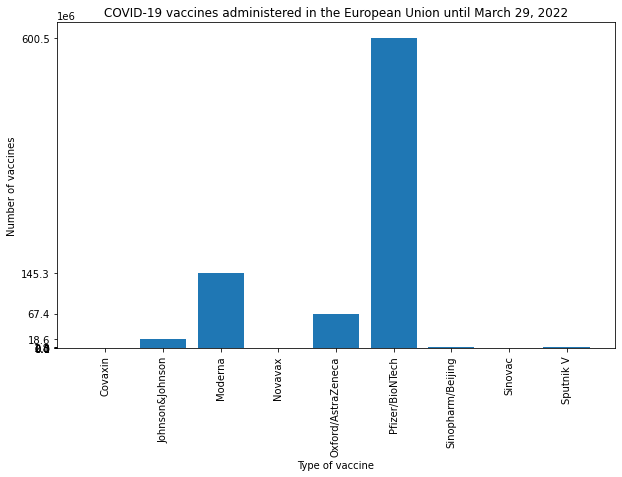

In [20]:
plt.figure(figsize=(10,6))
plt.bar(types_EU,numbers_EU)
plt.xticks(types_EU,rotation='vertical')
plt.yticks(numbers_EU)
plt.xlabel('Type of vaccine')
plt.ylabel('Number of vaccines')
plt.title('COVID-19 vaccines administered in the European Union until March 29, 2022')
plt.show()